# Mall Segmentation Data Analysis

# Unsupervised Machine Learning: 
##      Here i am interested to learn how to unsupervised machine learning algorithm works. 
## Theorefore i used K means clustering and agglomerative clustering techniques .

## Loading the Libraries

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Loading the Dataset

In [3]:
data=pd.read_csv(r"C:\Users\Priti\Downloads\submission\mall segmentation data.csv")
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data.set_index("CustomerID",inplace=True) # set customer id as index

In [5]:
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [6]:
data.info() # This gives information of the Data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
Gender                    200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(3), object(1)
memory usage: 7.0+ KB


In [7]:
data.isnull().sum() # This check null values of the data

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

## Descriptive of the Data 

In [8]:
data.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


## Data Visualisation

Text(0.5,1,'Scatter plot')

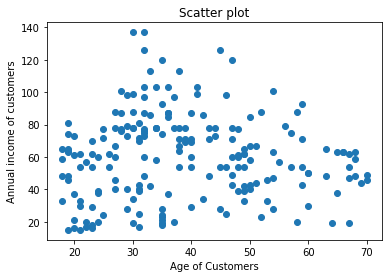

In [9]:
v1=data["Age"]
v2=data["Annual Income (k$)"]
plt.scatter(v1,v2)
plt.xlabel('Age of Customers')
plt.ylabel('Annual income of customers')
plt.title('Scatter plot')


Text(0.5,1,'Histogram')

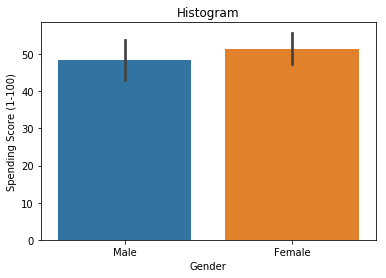

In [10]:
v3=data["Gender"]
v4=data["Spending Score (1-100)"]
sns.barplot(x=v3,y=v4) # By Mean
plt.title('Histogram')


Text(0.5,1,'Count Plot ')

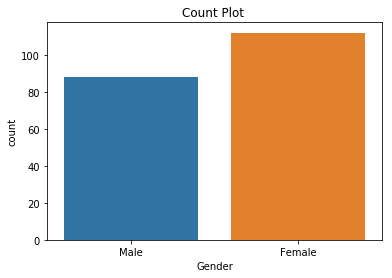

In [11]:
sns.countplot(x='Gender',data=data)
plt.title("Count Plot ")

Text(0.5,1,'Box Plot')

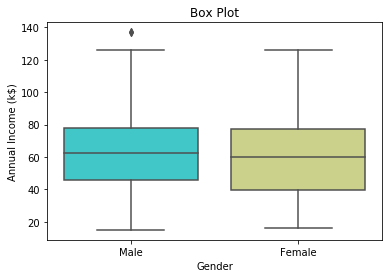

In [12]:
sns.boxplot(x="Gender", y="Annual Income (k$)", data=data,palette='rainbow')
plt.title("Box Plot")

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Distribution of Spending Score')

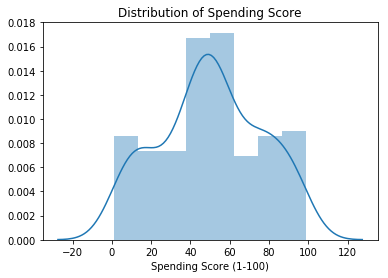

In [13]:
sns.distplot(data['Spending Score (1-100)'])
plt.title("Distribution of Spending Score")

Text(0.5,1,'Pair Plot')

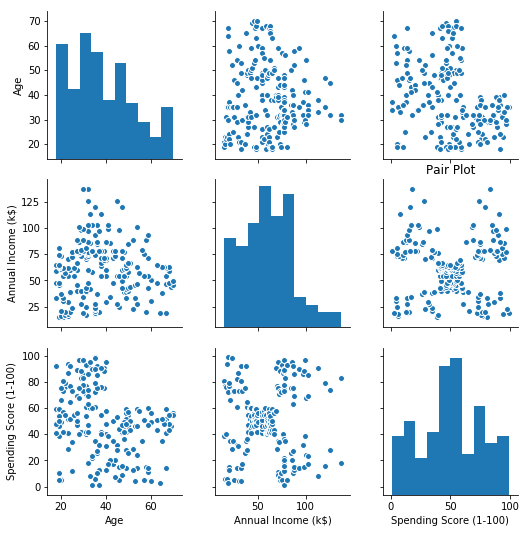

In [14]:
sns.pairplot(data)
plt.title("Pair Plot")

## Label Encoding 

In [15]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data["Gender"]=le.fit_transform(data["Gender"])
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,1,19,15,39
2,1,21,15,81
3,0,20,16,6
4,0,23,16,77
5,0,31,17,40


## Standardization of data

In [16]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df=scaler.fit_transform(data)

## Splitting of the data into x and y

In [17]:
x=data.iloc[0:151,:]
y=data.iloc[151:,:]

## K Means Clustering

In [18]:
from sklearn.cluster import KMeans
k=KMeans(n_clusters=5,random_state=0)
k.fit(x)
pred=k.predict(y)
print(pred)

[4 2 4 2 4 2 4 2 4 3 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 2 4 2 4 2 4]


In [19]:
label_true=k.labels_
label_true

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 3, 0, 3, 0,
       1, 0, 3, 2, 2, 2, 3, 0, 2, 3, 3, 3, 3, 3, 2, 3, 3, 2, 3, 3, 3, 2,
       3, 3, 2, 2, 3, 3, 3, 3, 3, 2, 3, 2, 2, 3, 3, 2, 3, 3, 2, 3, 3, 2,
       2, 3, 3, 2, 3, 2, 2, 2, 3, 2, 3, 2, 2, 3, 3, 2, 3, 2, 3, 3, 3, 3,
       3, 2, 2, 2, 2, 2, 3, 3, 3, 3, 2, 2, 2, 4, 2, 4, 2, 4, 3, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2])

In [20]:
k.cluster_centers_

array([[ 0.41666667, 25.83333333, 26.95833333, 77.79166667],
       [ 0.38095238, 44.14285714, 25.14285714, 19.52380952],
       [ 0.41304348, 29.17391304, 61.2826087 , 41.39130435],
       [ 0.45652174, 56.2173913 , 53.76086957, 48.26086957],
       [ 0.57142857, 33.71428571, 73.35714286, 82.71428571]])

## Agglomerative Hierarchical Clustering

In [21]:
from sklearn.cluster import AgglomerativeClustering
cluster=AgglomerativeClustering()
cluster.fit(x)
cluster.fit_predict(y)

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1], dtype=int32)

##  Dendrogram

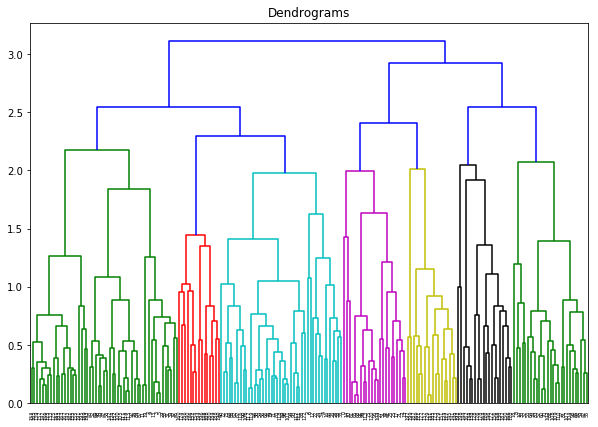

In [22]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10,7))
plt.title("Dendrograms")
dend=shc.dendrogram(shc.linkage(df,method='average'))